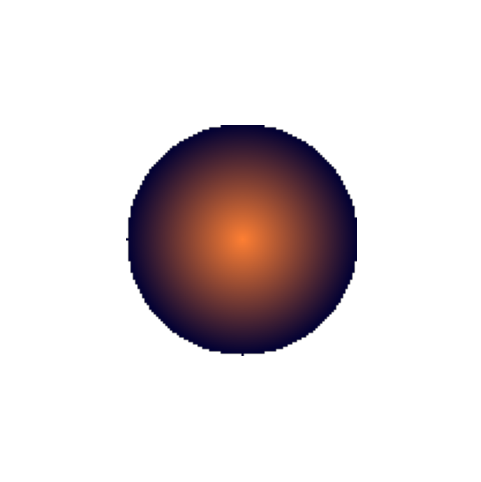

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Function to create a gradient
def create_gradient(radius):
    # Create an array for the gradient
    size = 2 * radius
    gradient = np.zeros((size, size, 3))
    
    for y in range(size):
        for x in range(size):
            # Calculate distance from center
            dist = np.sqrt((x - radius)**2 + (y - radius)**2)
            if dist <= radius:
                # Calculate color based on distance
                intensity = 1 - (dist / radius)  # Invert for gradient
                gradient[y, x] = (intensity, 0.5 * intensity, 0.2)  # RGB color
            
    return gradient

# Parameters
radius = 50
center = (100, 100)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Create gradient
gradient = create_gradient(radius)

KEY_FONT = 'DejaVu Sans Mono'
ax.text(center[0], center[1], 'X', ha='center', va='center', fontsize=10,font=KEY_FONT)
# Display the gradient as an image
ax.imshow(gradient, extent=(center[0] - radius, center[0] + radius, center[1] - radius, center[1] + radius),alpha=0.5)

# Create a circle outline (optional)
circle = Circle(center, radius, edgecolor='black', facecolor='none', linewidth=2)
ax.add_patch(circle)

# Set limits and aspect
ax.set_xlim(0, 200)
ax.set_ylim(0, 200)
ax.set_aspect('equal')

# Hide axes
ax.axis('off')

# Show plot
plt.show()


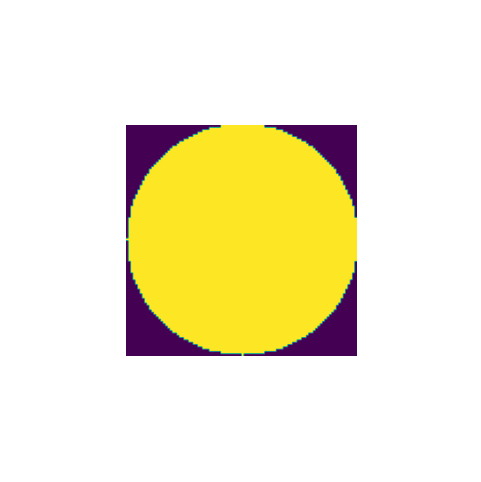

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Function to create a gradient
def create_gradient(radius):
    # Create an array for the gradient
    size = 2 * radius
    gradient = np.zeros((size, size))  # Adding an alpha channel
    
    for y in range(size):
        for x in range(size):
            # Calculate distance from center
            dist = np.sqrt((x - radius)**2 + (y - radius)**2)
            if dist <= radius:
                # Calculate color based on distance
                intensity = 1 - (dist / radius)  # Invert for gradient
                gradient[y, x] = (intensity) # RGB color
                gradient[y, x] = 1  # Fully opaque within the circle
            else:
                gradient[y, x] = 0  # Fully transparent outside the circle

    return gradient

# Parameters
radius = 50
center = (100, 100)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Create gradient
gradient = create_gradient(radius)

KEY_FONT = 'DejaVu Sans Mono'
ax.text(center[0], center[1], 'X', ha='center', va='center', fontsize=10,font=KEY_FONT)
# Display the gradient as an image
ax.imshow(gradient, extent=(center[0] - radius, center[0] + radius, center[1] - radius, center[1] + radius), origin='lower',zorder=3,cmap='viridis')

# Set limits and aspect
ax.set_xlim(0, 200)
ax.set_ylim(0, 200)
ax.set_aspect('equal')

# Hide axes
ax.axis('off')

# Show plot
plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Function to create a radial gradient
def create_radial_gradient(radius, resolution=100):
    """Creates a radial gradient that fades from the center of the circle to the edges."""
    gradient = np.zeros((resolution, resolution, 4))  # RGBA for alpha transparency
    center = resolution // 2
    
    for y in range(resolution):
        for x in range(resolution):
            # Calculate distance from the center
            dist = np.sqrt((x - center)**2 + (y - center)**2)
            if dist <= radius:
                # Calculate fading based on distance from the center (closer to center = more opaque)
                alpha = 1 - (dist / radius)  # Alpha fades with distance
                gradient[y, x, :3] = [1, 0.5


SyntaxError: unexpected EOF while parsing (1063263634.py, line 18)

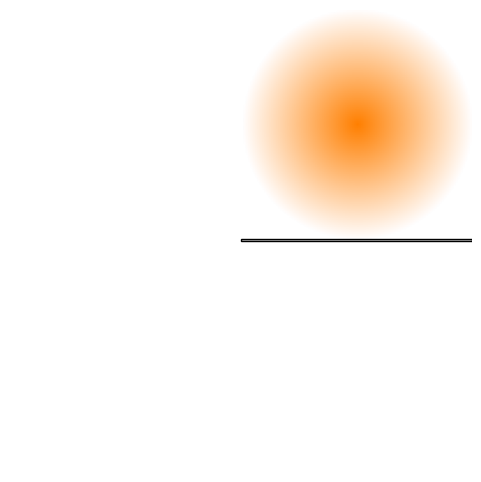

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Function to create a radial gradient
def create_radial_gradient(radius, resolution=100):
    """Creates a radial gradient that fades from the center of the circle to the edges."""
    gradient = np.zeros((resolution, resolution, 4))  # RGBA for alpha transparency
    center = resolution // 2
    
    for y in range(resolution):
        for x in range(resolution):
            # Calculate distance from the center
            dist = np.sqrt((x - center)**2 + (y - center)**2)
            if dist <= radius:
                # Calculate fading based on distance from the center (closer to center = more opaque)
                alpha = 1 - (dist / radius)  # Alpha fades with distance
                gradient[y, x, :3] = [1, 0.5, 0]  # Example orange color (R, G, B)
                gradient[y, x, 3] = alpha  # Set alpha to create fade
            else:
                gradient[y, x, 3] = 0  # Fully transparent outside the radius
    return gradient

# Parameters
radius = 50  # Radius of the circle
x_pos = 100
y_start = 100
width = 100

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Create and display the rectangle (keyboard key)
rect = Rectangle((x_pos, y_start), width, 1, edgecolor='black', facecolor='lightgray')
ax.add_patch(rect)

# Create radial gradient
gradient = create_radial_gradient(radius)

# Display the radial gradient as an image
extent = (x_pos, x_pos + width, y_start, y_start + width)  # Define where to place the gradient
ax.imshow(gradient, extent=extent, origin='lower')

# Set limits and aspect ratio
ax.set_xlim(0, 200)
ax.set_ylim(0, 200)
ax.set_aspect('equal')

# Hide axis
ax.axis('off')

# Show plot
plt.show()


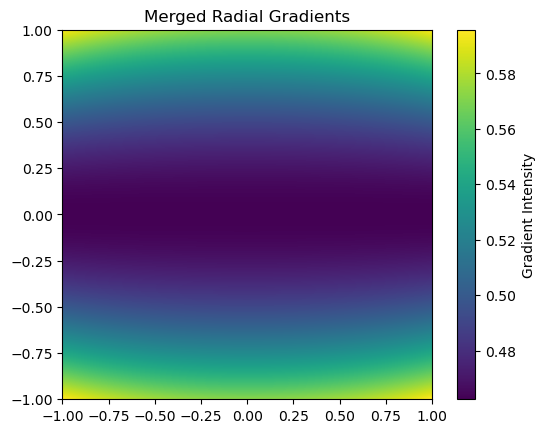

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of coordinates
x = np.linspace(-1, 1, 500)
y = np.linspace(-1, 1, 500)
X, Y = np.meshgrid(x, y)

# Define two radial gradients
gradient1 = np.sqrt((X + 2)**2 + Y**2)  # Centered at (-0.5, 0)
gradient2 = np.sqrt((X - 2)**2 + Y**2)  # Centered at (0.5, 0)

# Normalize the gradients
gradient1 = (gradient1 - gradient1.min()) / (gradient1.max() - gradient1.min())
gradient2 = (gradient2 - gradient2.min()) / (gradient2.max() - gradient2.min())

# Merge the gradients using a weighted average
merged_gradient = (gradient1 + gradient2) / 2

# Plot the merged radial gradients
plt.imshow(merged_gradient, extent=[-1, 1, -1, 1], cmap='viridis', origin='lower')
plt.colorbar(label="Gradient Intensity")
plt.title("Merged Radial Gradients")
plt.show()
